In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#Loading Data
company = 'GOOG'

start = dt.datetime(2012, 1, 1)
end = dt.datetime(2020, 1, 1)

data = web.DataReader(company, 'yahoo', start, end)

#preparing data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

In [14]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-27,144.750000,138.000000,139.850006,143.699997,26041244,143.699997
2021-09-28,143.899994,137.649994,143.899994,139.000000,13489232,139.000000
2021-09-29,139.500000,136.500000,138.000000,138.500000,10801439,138.500000
2021-09-30,139.199997,136.149994,139.199997,136.600006,7825751,136.600006
2021-10-01,140.500000,137.000000,137.300003,138.000000,11940576,138.000000


In [15]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-26,143.750000,125.300003,126.349998,140.649994,249723854,140.649994
2021-07-27,147.800003,127.750000,141.699997,132.899994,240341900,132.899994
2021-07-28,135.000000,123.550003,131.000000,131.199997,159793731,131.199997
2021-07-29,144.000000,132.199997,134.949997,141.550003,117973089,141.550003
2021-07-30,142.699997,131.000000,142.600006,133.500000,88312522,133.500000


In [16]:
x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x- prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

In [17]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

IndexError: tuple index out of range

In [ ]:
#Build the Model
model = Sequential()

model.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units =50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM (units =50))
model.add(Dropout(0.2))
model.add(Dense(units =1)) #prediciton of next closing value

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size= 32)

Epoch 1/25
61/61 [==============================] - 7s 56ms/step - loss: 0.0191
Epoch 2/25
61/61 [==============================] - 3s 56ms/step - loss: 0.0040
Epoch 3/25
61/61 [==============================] - 3s 57ms/step - loss: 0.0034
Epoch 4/25
61/61 [==============================] - 4s 69ms/step - loss: 0.0028
Epoch 5/25
61/61 [==============================] - 4s 59ms/step - loss: 0.0028
Epoch 6/25
61/61 [==============================] - 4s 59ms/step - loss: 0.0027
Epoch 7/25
61/61 [==============================] - 4s 63ms/step - loss: 0.0028
Epoch 8/25
61/61 [==============================] - 4s 60ms/step - loss: 0.0026
Epoch 9/25
61/61 [==============================] - 3s 55ms/step - loss: 0.0025
Epoch 10/25
61/61 [==============================] - 3s 57ms/step - loss: 0.0027
Epoch 11/25
61/61 [==============================] - 3s 55ms/step - loss: 0.0025
Epoch 12/25
61/61 [==============================] - 3s 55ms/step - loss: 0.0023
Epoch 13/25
61/61 [==================

In [ ]:
#Testing the model accuracy on existing data
#Loading the Test Dataa
test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len (test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

In [ ]:
#making predection on test dataa

x_test = []

for x in range (prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediced_prices = model.predict(x_test)
prediced_prices = scaler.inverse_transform(prediced_prices)


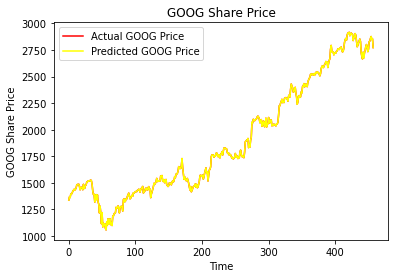

In [ ]:
#ploting the tested predictions

plt.plot(actual_prices, color = 'red', label =  f"Actual {company} Price")
plt.plot(actual_prices, color = 'yellow', label = f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [ ]:
#predicting next day

real_data = [model_inputs[len(model_inputs) +1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[2272.8635]]
